# Attacker Activity

Using log data from a Cowrie honeypot stored in an SQLite database, we can plot the attackers on a map. 

_Harmless one-off attacks are labelled green. Suspicious attacks are marked orange. Very suspicious attacks are orange **and** with a trace line. Potential advanced persistent threats are marked red with a trace line._ 

In [387]:
import common
import random
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

conn = common.connect_db('db.sqlite')
data = pd.read_sql_query("SELECT * from attacker_profiles", conn)

m = folium.Map(location=[50, -25], zoom_start=3)

for index, element in data.iterrows():
    src_ip = element['src_ip']
    continent_code = element['continent_code']
    lat = element['latitude']
    lon = element['longitude']
    country_name = element['country_name']
    subdivision_name = element['subdivision_name']
    city_name = element['city_name']
    radius = element['accuracy_radius']
    attack_count = element['attack_count']
    
    if element['asn'] is not None:
        asn = element['asn']
    else:
        asn = "No ASN"
    
    if element['subdivision_name'] is not None:
        subdivision_name = element['subdivision_name']
    else:
        subdivision_name = ""

    # Don't show attacks made from the same city as the Honeypot (aka, me logging in to test things)
    if city_name != "Toronto":
        
        sensor = [43.6532,-79.3832]
        attacker = [lat,lon]
        
        if attack_count >= 500:
            color = 'red'
            folium.PolyLine(locations=[attacker, sensor], color=color).add_to(m)
        if 20 < attack_count < 500:
            color = 'orange'
            folium.PolyLine(locations=[attacker, sensor], color=color).add_to(m)
        if 4 < attack_count < 20:
            color = 'orange'
        if attack_count < 3:
            color = 'green'
        
        popup_tag = '<i>' +city_name+', '+subdivision_name+', '+ '</i><b>'+ country_name+'<br><br></b>Accuracy: '+str(radius)+'km <br>' + 'Attacks: ' + str(attack_count) +'<br><br>'+ str(asn) + '<b><br>' + str(src_ip) + '</b></i>'
        folium.Marker(
            location=[lat, lon], 
            popup=popup_tag,
            icon=folium.Icon(color=color, icon='cloud')
        ).add_to(m)

    
 
# Draw our honeypot last so it is drawn on top
folium.Marker(
    location=sensor,
    popup='Some Other Location',
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(m)
    
m

## Attacks by IP Address

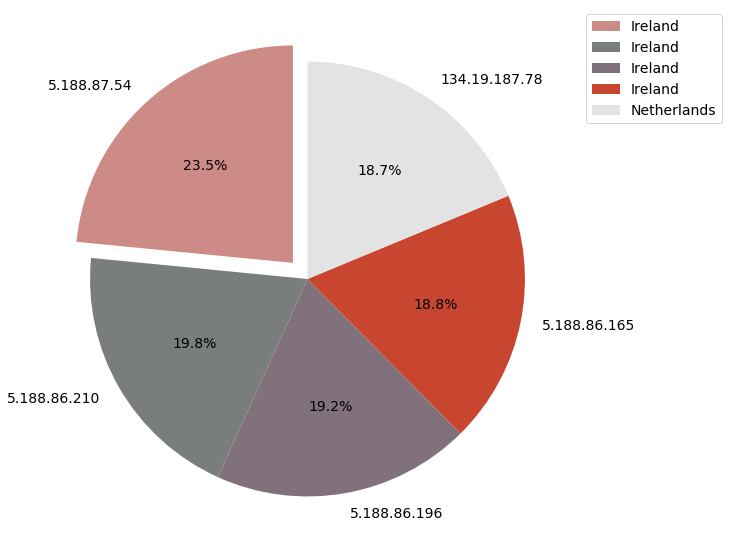

In [677]:
data = pd.read_sql_query("SELECT * from attacker_profiles", conn)
data = data.sort_values(['attack_count'],ascending=False)
data.groupby(['country_name','attack_count'])
data = data[0:5]

colors = ["#cc8b86", "#7a7d7d", "#81717a", "#c84630", "#e3e3e3"]

plt.figure(figsize=(10,10))
ax1 = plt.subplot()

explode = (0.1, 0, 0, 0, 0)  

data.plot(kind='pie', y = 'attack_count', ax=ax1, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=False, labels=data['src_ip'], legend = False, fontsize=14)

#ax1.legend(loc=9, labels=data['country_name'])
plt.legend(bbox_to_anchor=(1,1), prop={'size': 14}, labels=data['country_name'])

ax2 = plt.subplot()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

plt.axis('off')
plt.show()

## Attacks by Country

Here is some markdown, blah blah blah

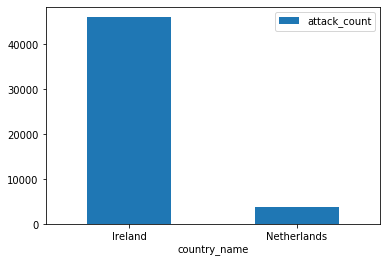

In [570]:
from IPython.display import display

data = pd.read_sql_query("SELECT * from country_stats", conn)
data = data.sort_values(by='attack_count',ascending=False)
data = data[0:2]
colors = ["#bcd4de", "#7c98b3", "#adcad6", "#848c8e", "#afbed1"]

#ax1 = plt.subplot(121, aspect='equal')
ax = data.plot.bar(x='country_name', y='attack_count', rot=0)
plt.show()


In [166]:
# Some sample code brainstorming out how we'll retrieve data based on timeframe

from datetime import datetime, timedelta
import dateutil.parser

iso = "2019-07-09T10:01:53.342265Z"
timestamp = dateutil.parser.parse(iso)
print("Received:")
print(timestamp.date())

print("Retrieve records since last month, timestamp containing:")
last_month = timestamp - timedelta(days=30)
print(last_month.date())

# SELECT * from attack_log where timestamps CONTAINS ...

time = str(timestamp).split()[1].split(".")[0]
hour, minute = time.split(":")[0:2]

# Get timezone from attack log entry, convert it from UTC, append as local_timestamp?
# The timestamp in the attackers timezone is useful information, aka are they 9am-5pm? 

# Attacks based on day of the week:
#datetime.isoweekday(timestamp)
#datetime.isocalendar(timestamp)



Received:
2019-07-09
Retrieve records since last month, timestamp containing:
2019-06-09
